In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Подготовка данных

In [109]:
data = pd.read_csv('dermatology_database_1.csv')

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

In [111]:
data.loc[data['age'] == '?', 'age'] = 35 # средний возраст по датасету
data.age = data.age.astype(int)

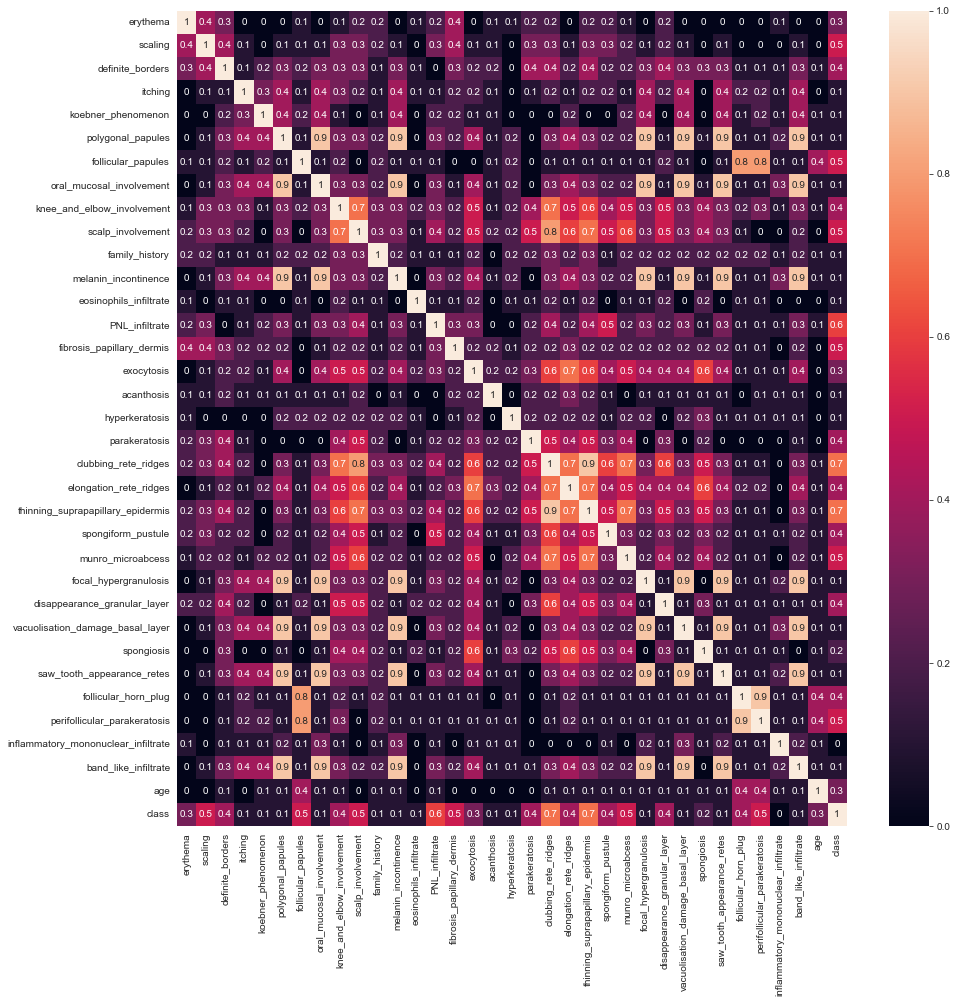

In [112]:
ax = plt.subplots(figsize=(15,15)) 
ax = sns.heatmap(round(abs(data.corr()), 1), annot=True)

In [113]:
data = data.drop(['polygonal_papules', 'oral_mucosal_involvement', 'melanin_incontinence', 'focal_hypergranulosis',
                 'vacuolisation_damage_basal_layer', 'saw_tooth_appearance_retes', 'follicular_horn_plug', 'perifollicular_parakeratosis',
                 'band_like_infiltrate', 'clubbing_rete_ridges', 'thinning_suprapapillary_epidermis', 'scalp_involvement', 'exocytosis', 'elongation_rete_ridges',
                 'inflammatory_mononuclear_infiltrate', 'hyperkeratosis', 'acanthosis', 'eosinophils_infiltrate', 'family_history', 'koebner_phenomenon', 'itching', 'spongiosis'], axis=1)

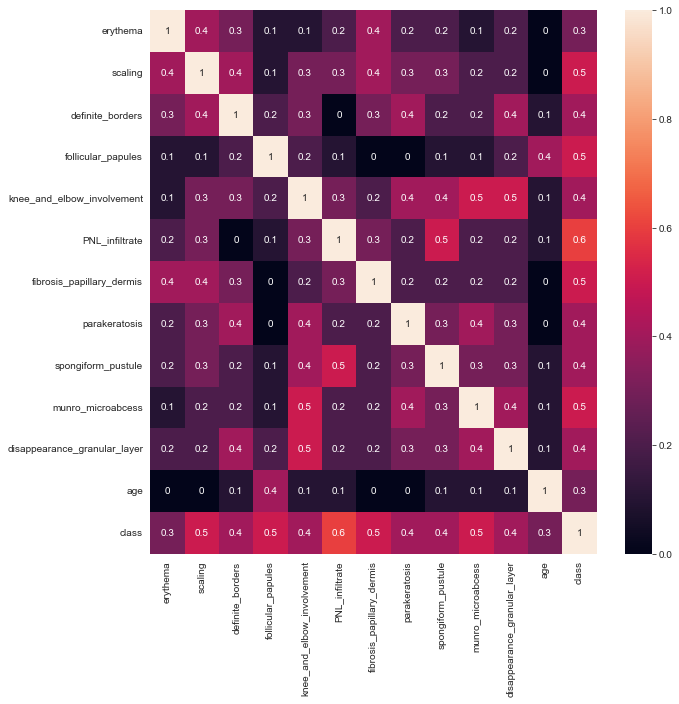

In [114]:
ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(round(abs(data.corr()), 1), annot=True)

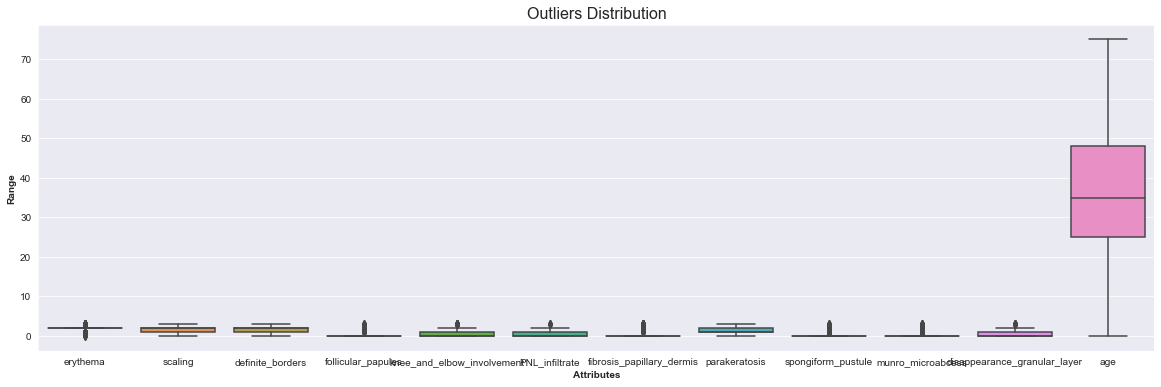

In [115]:
def show_boxplot(df):
    plt.rcParams['figure.figsize'] = [20,6]
    sns.boxplot(data = df, orient="v")
    plt.title("Outliers Distribution", fontsize = 16)
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel("Attributes", fontweight = 'bold')
    
show_boxplot(data.drop('class', axis=1))

# Иерархическая кластеризация

In [116]:
from sklearn.preprocessing import StandardScaler

data_scaler = StandardScaler()

scaled_data = data_scaler.fit_transform(data.drop('class', axis=1))
scaled_data.shape

(366, 12)

In [117]:
from scipy.cluster.hierarchy import linkage, dendrogram

complete_clustering = linkage(scaled_data, method="complete", metric="euclidean")
average_clustering = linkage(scaled_data, method="average", metric="euclidean")
single_clustering = linkage(scaled_data, method="single", metric="euclidean")

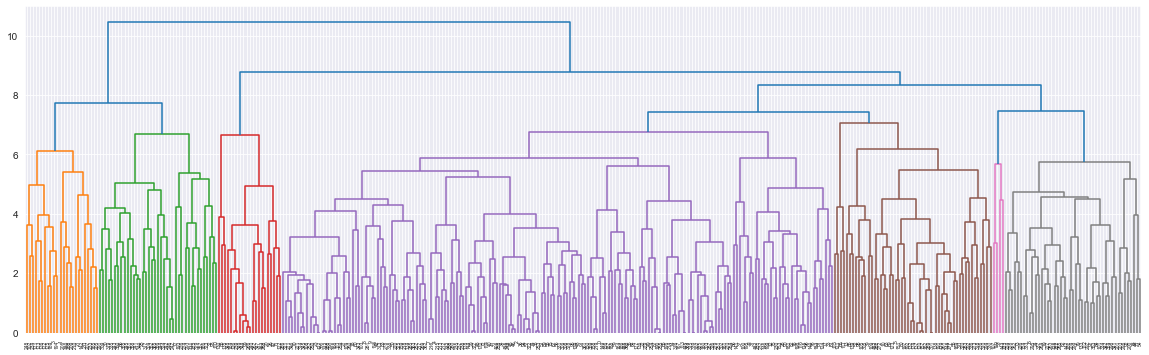

In [118]:
dendrogram(complete_clustering)
plt.show()

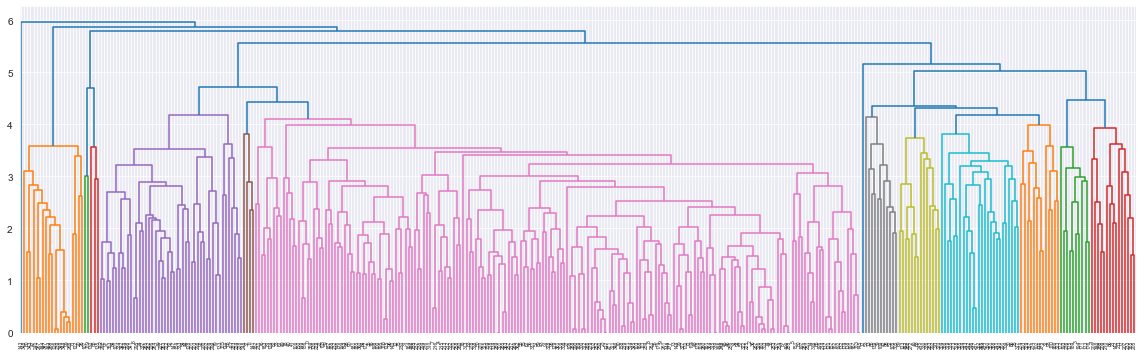

In [119]:
dendrogram(average_clustering)
plt.show()

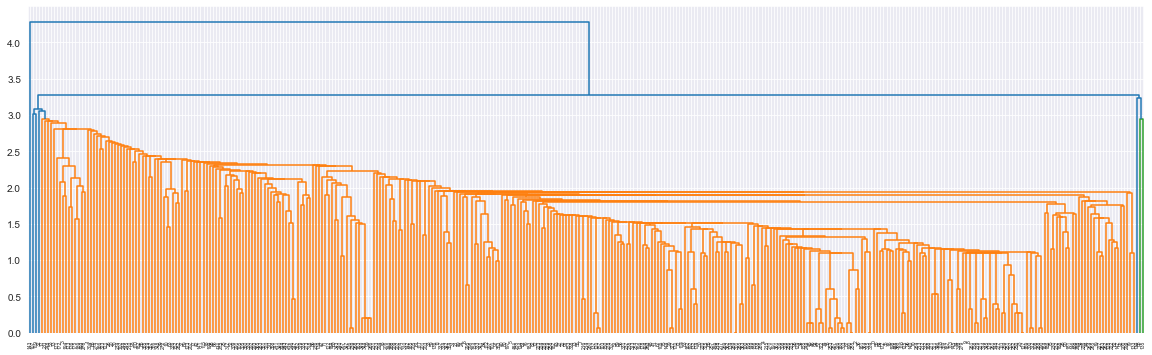

In [120]:
dendrogram(single_clustering)
plt.show()

# K-means кластеризация

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0, 0.5, 'Внутри-кластерная сумма расстояний')

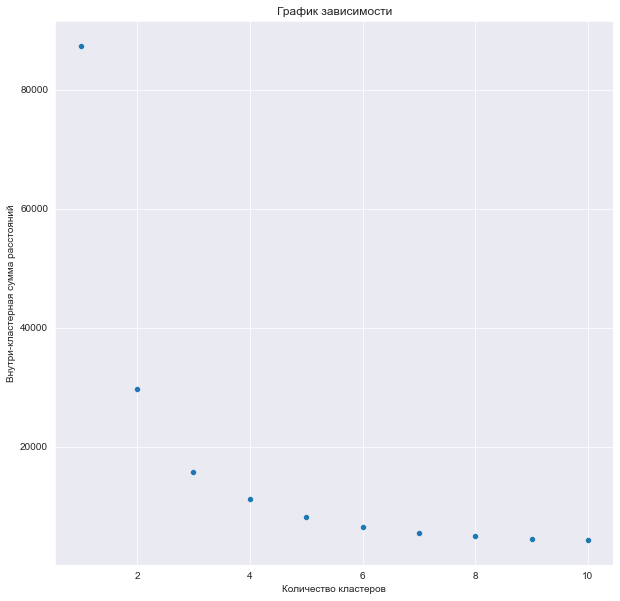

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, init= 'k-means++')
    k_means.fit(data)
    
    inertia.append(k_means.inertia_)

plt.rcParams['figure.figsize'] = [10,10]
sns.set_style('darkgrid')
sns.scatterplot(x = [x for x in range(1, 11)], y = inertia)
plt.title('График зависимости')
plt.xlabel('Количество кластеров')
plt.ylabel('Внутри-кластерная сумма расстояний')

In [127]:
import numpy as np

CLUSTERS = 4
model = KMeans(n_clusters=CLUSTERS)
model.fit(data.drop("class", axis=1))
clusters = pd.DataFrame(columns=data.columns.drop("class"), data=model.cluster_centers_)
clusters["Amount"] = np.unique(model.labels_, return_counts=True)[1]

clusters

,erythema,scaling,definite_borders,follicular_papules,knee_and_elbow_involvement,PNL_infiltrate,fibrosis_papillary_dermis,parakeratosis,spongiform_pustule,munro_microabcess,disappearance_granular_layer,age,Amount
0,2.088235,1.813725,1.617647,0.049020,0.352941,0.411765,0.313725,1.303922,0.284314,0.343137,0.411765,45.833333,102
1,2.073171,1.743902,1.280488,0.585366,0.817073,0.524390,0.317073,1.195122,0.292683,0.219512,0.256098,16.182927,82
2,2.090909,1.836364,1.727273,0.036364,0.890909,0.818182,0.363636,1.345455,0.490909,0.545455,0.763636,59.836364,55
3,2.039370,1.795276,1.590551,0.047244,0.574803,0.551181,0.354331,1.314961,0.220472,0.393701,0.511811,31.346457,127
